In [2]:
import numpy as np
import os
import tqdm 
import json

from utils_graph_generation import load_graph, get_paths
from utils_graph_metrics import get_exp, calc_pdf_points, calc_cdf_points, calc_ccdf_points, tresh_normalization, convert_keys_to_float
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution, plot_yerali


# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [20]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, plots_folder, measures_name, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250], normalize=False):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
        
    arr_points = []
    dict_points = {}
    # En los archivos guardo los grados de los nodos en bruto, sin sufrir procesos de normalización
    if os.path.exists(measures_name + '_degs_kt.json'):
        try:
            with open(measures_name + '_degs_kt.json', 'r') as f:
                dict_points = json.load(f)
            dict_points = convert_keys_to_float(dict_points, tipo="int")
        except json.JSONDecodeError:
            pass

    for kt in tqdm.tqdm(arr_kt_plot):
        if not kt in dict_points.keys():
            F = tresh_normalization(G, kt)
            if F != -1:
                points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float))
                dict_points[kt] = list(points_kt)
    
        else:
            points_kt = dict_points[kt]
        print("Kt", kt, ":", len(points_kt), "nodos con avg degree:", np.mean(points_kt))
        if normalize:
            points_kt = np.array(points_kt) / np.mean(points_kt)

        arr_points.append(points_kt)

    with open(measures_name + '_degs_kt.json', "w") as f:
        json.dump(dict_points, f, indent=2)

    plot_degree_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot, alpha=0.45, num_bins=100, max_bins=max(max(k) for k in arr_points), min_bins=min(min(k) for k in arr_points))

    arr_deg_prob = plot_degree_probability_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

In [57]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

# MANIFESTACION = "9n"
# hora = "437037"

graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)

In [ ]:
calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, measures_name, arr_kt_plot=[0], normalize=True)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)

graphs/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


100%|██████████| 7/7 [00:00<00:00, 17414.07it/s]

Kt 10 : 203 nodos con avg degree: 31.03448275862069
Kt 12 : 175 nodos con avg degree: 32.81142857142857
Kt 14 : 140 nodos con avg degree: 36.05714285714286
Kt 15 : 127 nodos con avg degree: 37.338582677165356
Kt 16 : 118 nodos con avg degree: 38.16949152542373
Kt 18 : 111 nodos con avg degree: 38.93693693693694
Kt 20 : 97 nodos con avg degree: 39.876288659793815


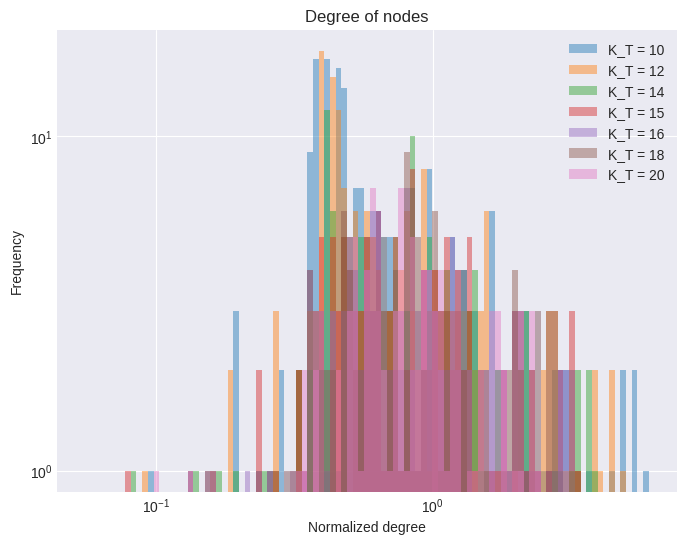

plots/degree/nodes_hashtag/nat/429624_pdf - K_T_[10, 12, 14, 15, 16, 18, 20].png


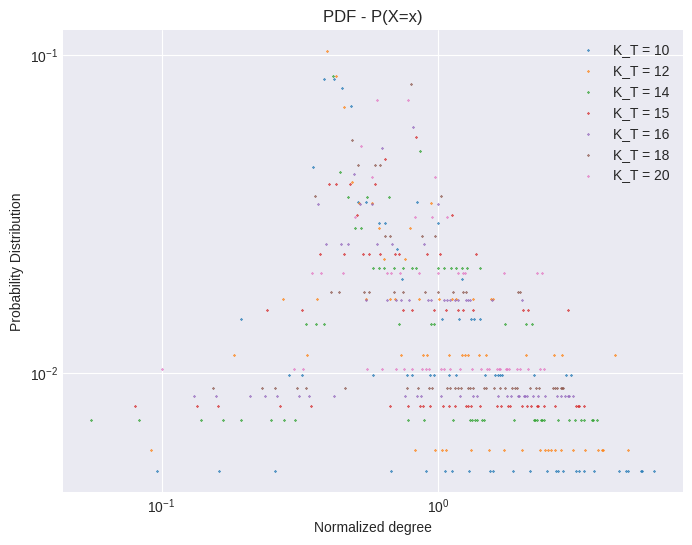

plots/degree/nodes_hashtag/nat/429624_cdf - K_T_[10, 12, 14, 15, 16, 18, 20].png


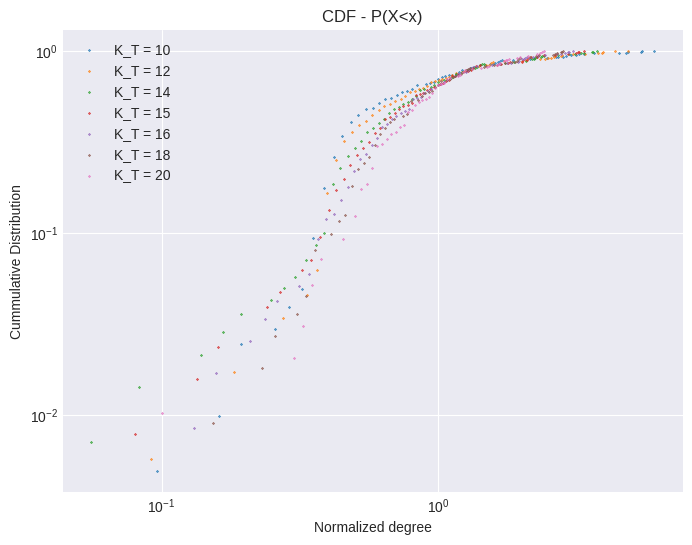

plots/degree/nodes_hashtag/nat/429624_ccdf - K_T_[10, 12, 14, 15, 16, 18, 20].png


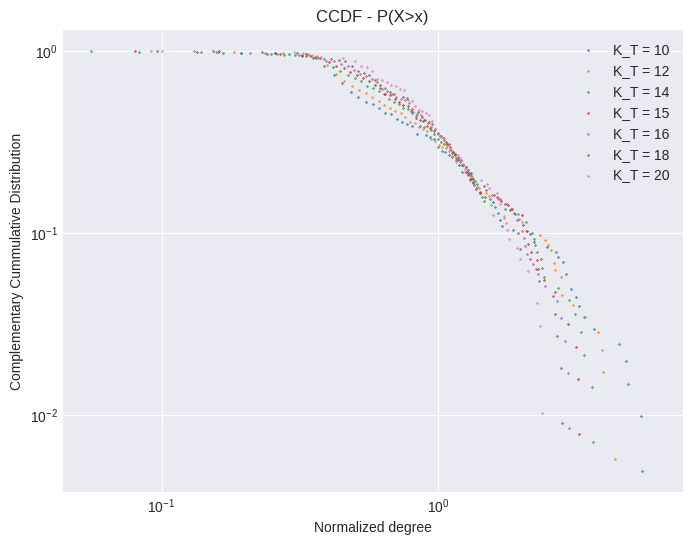

In [59]:
graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)

arr_kt_plot = [10,12,14,15,16,18,20] 
calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, measures_name, arr_kt_plot=arr_kt_plot, normalize=True)

In [6]:
def calc_yerali(name_graph, graphs_folder, plots_folder, G=None, plfit=True, normalize = False, show_comparative=False, only_ntamas=False):
    G = load_graph(name_graph, graphs_folder)
    
    G = tresh_normalization(G, 0)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float))
    plfit = get_exp([points], name_graph, show_comparative=show_comparative, only_ntamas=only_ntamas)

    arr_pdf_points = calc_pdf_points([points], G.number_of_nodes())

    arr_cdf_points = calc_cdf_points(arr_pdf_points)

    arr_ccdf_points = calc_ccdf_points(arr_cdf_points)

    plot_yerali(arr_pdf_points, arr_ccdf_points, plfit)

In [ ]:
def plot_weight_distribution(G, plots_folder):
    edges = G.edges(data=True)
    weights =[]
    for edge in edges:
        weights.append(edge)

graphs/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


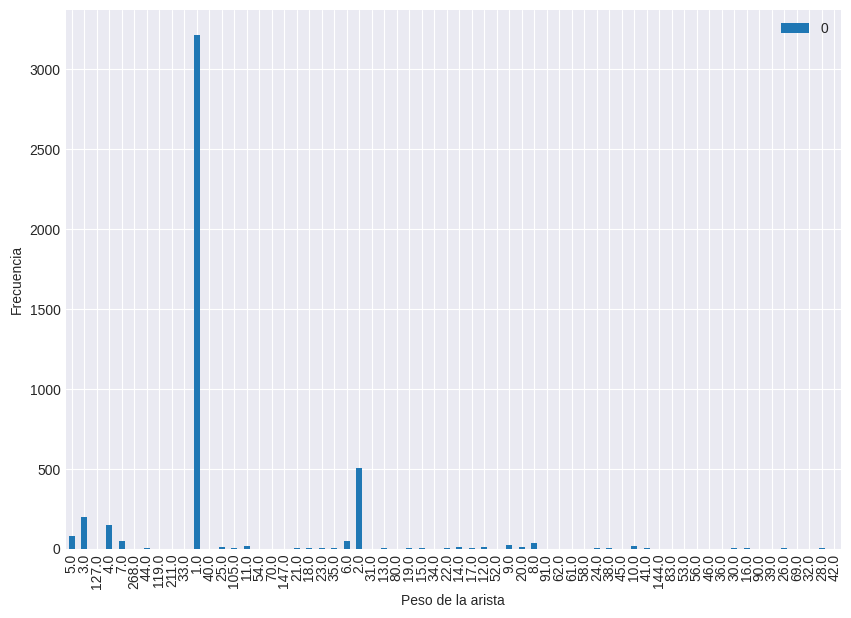

In [61]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)
G = load_graph(hora, graphs_folder)
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
count = Counter(list(nx.get_edge_attributes(G, "weight").values()))
df = pd.DataFrame.from_dict(count, orient='index')
ax = df.plot(kind='bar', figsize=(10,7))

# Configurar el gráfico (opcional)
ax.set_xlabel('Peso de la arista')
ax.set_ylabel('Frecuencia')

# Guardar el gráfico en un archivo
plt.savefig("plots/edge_weights_" + MANIFESTACION + '_' + hora + '.png')